In [ ]:
from google.colab.patches import cv2_imshow
import os
import pathlib
import cv2
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import pandas as pd

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
new_dir_test = '/content/drive/My Drive/Datasets/kdef_akdef/KDEF_front(bw)(with train-test-val split)/test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      #rotation_range=40,
      #width_shift_range=0.2,
      #height_shift_range=0.2,
      #shear_range=0.2,
      #zoom_range=0.2,
      horizontal_flip=True,
      #fill_mode='nearest'
      )

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_generator = test_datagen.flow_from_directory(
        new_dir_test,  # This is the source directory for training images
        target_size=(200,200),  
        batch_size=10,
        color_mode = 'grayscale',
        shuffle=False,
        class_mode='categorical')

Found 149 images belonging to 7 classes.


In [ ]:
model_dex = tf.keras.models.load_model('/content/drive/My Drive/BE_Project_Final_models/kdef_models/model_dex_kd_bw(imp).h5')
model_simple1 = tf.keras.models.load_model('/content/drive/My Drive/BE_Project_Final_models/kdef_models/model_simple1_kd_bw.h5')
model_simple_batch = tf.keras.models.load_model('/content/drive/My Drive/BE_Project_Final_models/kdef_models/model_simple_kd_bw_modified1(Batchnorm).h5')
model_simple_layer = tf.keras.models.load_model('/content/drive/My Drive/BE_Project_Final_models/kdef_models/model_simple_kd_bw_modified2(Layernorm).h5')

In [ ]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], dtype=int32)

In [ ]:
#Confution Matrix and Classification Report
Y_pred = model_simple_layer.predict_generator(test_generator, 149 // 10+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cnf=confusion_matrix(test_generator.classes, y_pred)
print('Classification Report')
target_names = ['Anger', 'Disgust', 'Fear','Happy','Neutral','Sad','Surprise']
clf =classification_report(test_generator.classes, y_pred, target_names=target_names)

Confusion Matrix
Classification Report


In [ ]:
plt.rcParams.update({'text.color': 'black','font.size':15})

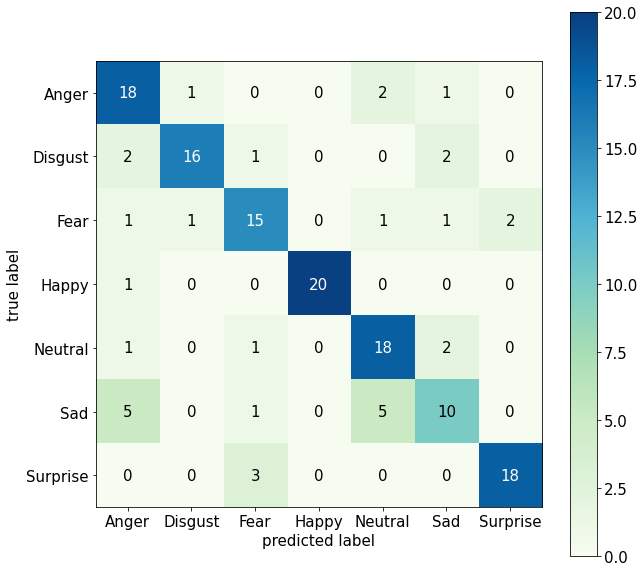

              precision    recall  f1-score   support

       Anger       0.64      0.82      0.72        22
     Disgust       0.89      0.76      0.82        21
        Fear       0.71      0.71      0.71        21
       Happy       1.00      0.95      0.98        21
     Neutral       0.69      0.82      0.75        22
         Sad       0.62      0.48      0.54        21
    Surprise       0.90      0.86      0.88        21

    accuracy                           0.77       149
   macro avg       0.78      0.77      0.77       149
weighted avg       0.78      0.77      0.77       149



In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=cnf,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=False,figsize=(10,10),cmap='GnBu')
ax.set_xticklabels([''] + list(np.unique(target_names)))
ax.set_yticklabels([''] + list(np.unique(target_names)))

plt.show()
print(clf)

In [ ]:
score = model_simple_layer.evaluate(test_generator, verbose=1, steps=15)

15/15 [==============================] - 0s 22ms/step - loss: 0.5452 - accuracy: 0.7718
